In [1]:
import pandas as pd

In [44]:
vac=pd.read_csv("D:\Data Science\python\h1n1_vaccine_prediction.csv")

In [3]:
vac.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [54]:
# data cleaning

In [4]:
vac.isnull().sum()[vac.isnull().sum()>0]

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
qualification                 1407
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
no_of_adults                   249
no_of_children                 249
dtype: int64

In [5]:
vac.h1n1_worry.fillna(2, inplace = True)
vac.h1n1_awareness.fillna(1, inplace = True)
vac.antiviral_medication.fillna(0, inplace = True)
vac.contact_avoidance.fillna(1, inplace = True)
vac.bought_face_mask.fillna(0, inplace = True)
vac.wash_hands_frequently.fillna(1, inplace = True)
vac.avoid_large_gatherings.fillna(0, inplace = True)
vac.reduced_outside_home_cont.fillna(0, inplace = True)
vac.avoid_touch_face.fillna(1, inplace = True)
vac.dr_recc_h1n1_vacc.fillna(0, inplace = True)
vac.dr_recc_seasonal_vacc.fillna(0, inplace = True)
vac.chronic_medic_condition.fillna(0, inplace = True)
vac.cont_child_undr_6_mnths.fillna(0, inplace = True)
vac.is_health_worker.fillna(0, inplace = True)
vac.has_health_insur.fillna(1, inplace = True)
vac.is_h1n1_vacc_effective.fillna(4, inplace = True)
vac.is_h1n1_risky.fillna(2, inplace = True)
vac.sick_from_h1n1_vacc.fillna(2, inplace = True)
vac.is_seas_vacc_effective.fillna(4, inplace = True)
vac.is_seas_risky.fillna(2, inplace = True)
vac.sick_from_seas_vacc.fillna(1, inplace = True)
vac.qualification.fillna('College Graduate', inplace = True)
vac.income_level.fillna('<= $75,000, Above Poverty', inplace = True)
vac.marital_status.fillna('Married', inplace = True)
vac.housing_status.fillna('Own', inplace = True)
vac.employment.fillna('Employed', inplace = True)
vac.no_of_adults.fillna(1, inplace = True)
vac.no_of_children.fillna(0, inplace = True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
#vac[vac.select_dtypes(include = 'object').columns] = vac[vac.select_dtypes(include = 'object').columns].apply(le.fit_transform)
vac[vac.select_dtypes(include='object').columns]=vac[vac.select_dtypes(include='object').columns].apply(le.fit_transform)

In [8]:
vac1=vac

In [9]:
vac= vac.drop(["unique_id"],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
train_vac,test_vac=train_test_split(vac,test_size=.2)

In [12]:
train_y=train_vac.h1n1_vaccine
test_y=test_vac.h1n1_vaccine

train_x=train_vac.iloc[::,:-1]
test_x= test_vac.iloc[:,:-1]

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg=LogisticRegression()

In [18]:
logreg.fit(train_x,train_y)

LogisticRegression()

In [19]:
pred= logreg.predict(test_x)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
tab1= confusion_matrix(test_y,pred)
tab1

array([[3979,  206],
       [ 683,  474]], dtype=int64)

In [22]:
from sklearn.metrics import *

In [23]:
#accuracy
acc=accuracy_score(test_y,pred)
tab1.diagonal().sum()/tab1.sum()

0.8335829277424186

In [53]:
#fpr
fpr=tab1[0][1]/(tab1[0][1]+tab1[0][0])

In [25]:
#precision score
pre=precision_score(test_y,pred)

0.6970588235294117

In [26]:
#recall(tpr)
tpr=recall_score(test_y,pred)*100

40.96802074330164

In [27]:
#f1 score
f1=f1_score(test_y,pred)*100

51.605879150789335

In [28]:
# taking out probability
pred_pro=logreg.predict_proba(test_x)

In [29]:
#converting into 0,1
pred_pro.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
df= pd.DataFrame(pred_pro)
df.columns=["Pred0","Pred1"]
df

,Pred0,Pred1
0,0.971097,0.028903
1,0.823124,0.176876
2,0.992344,0.007656
3,0.945974,0.054026
4,0.767312,0.232688
...,...,...
5337,0.808723,0.191277
5338,0.982910,0.017090
5339,0.925612,0.074388
5340,0.893674,0.106326


In [31]:
roc_auc_score(test_y,pred_pro[:,1])

0.8293597023571652

In [32]:
fpr,tpr,thre=roc_curve(test_y,pred_pro[:,1])

In [33]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'roc_auc_score=0.8181')

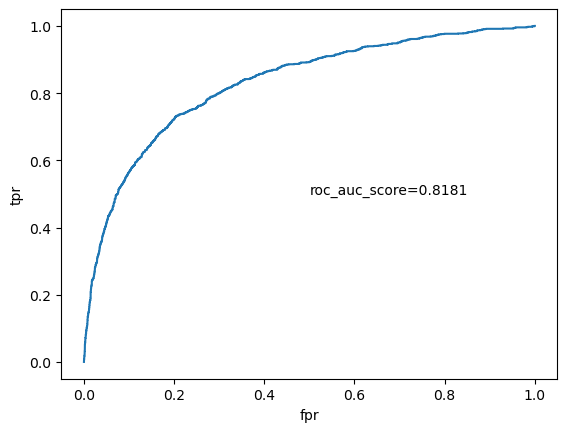

In [34]:
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.text(x=.5,y=.5, s="roc_auc_score=0.8181")

In [35]:
#

In [36]:
##2nd problem statement: target the customer whom you think are good customers
#targetting the customer

In [37]:
pred_pro_full=logreg.predict_proba(vac.iloc[:,:-1])

In [38]:
pred_pro_full=pd.DataFrame(pred_pro_full)
pred_pro_full.columns=["Prob0","Prob1"]

In [39]:
pred_pro_full["unique_id"]=vac1.unique_id

In [40]:
pred_pro_full=pred_pro_full.sort_values("Prob1",ascending=False)

In [41]:
pred_pro_full=pred_pro_full.drop(["Prob0"],axis=1)

In [42]:
pred_pro_full_final=pred_pro_full[pred_pro_full.Prob1>=.8]

In [43]:
pred_pro_full_final

,Prob1,unique_id
6024,0.962800,6024
10135,0.945327,10135
16473,0.942778,16473
9531,0.940609,9531
24187,0.940151,24187
...,...,...
10715,0.800384,10715
11096,0.800318,11096
15653,0.800283,15653
4383,0.800274,4383


over sampling

In [48]:
vac.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [49]:
21033/5674

3.706908706379979

In [57]:
# adding this line after train test spit
# df= train_vac[train_vac.h1n1_vaccine==1]
# train_vac=pd.cocat([train_vac,df])

In [58]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
5295,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,0,0,0.0,0.0,1
2569,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,1,0,0,1,0,1.0,0.0,1
2617,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2,0,0,0,0,0,1,1.0,1.0,1
2313,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,2,0.0,0.0,1
15721,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3,1,0,0,0,1,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11573,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,1,1,0,1,1,3.0,0.0,1
9592,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3,1,1,0,0,0,0,1.0,2.0,1
5475,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3,1,0,0,0,0,0,1.0,0.0,1
25008,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,0,1,0,0,0,0.0,0.0,1
